In [99]:
# let's do something called Natural Language Processing
# it's training a computer to understand language the way us humans do
# for example if you have a paragraph, you can tell what is is all about by reading through it
# a computer cannot do that: you have to train it to recognise patterns in the paragraph... e.t.c
# you can google about it to learn more
# this file we use is on Kaggle.com and contains 300,000 song lyrics from 11 different genres and more than 6 languages

In [100]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

In [101]:
songList = pd.read_csv('data/lyrics.csv', index_col=0)
len(songList) # we have a total of 362,237 rows alltogether

362237

In [102]:
# clean the data
emptyLyrics = len(songList)
songList = songList[songList['lyrics']!='instrumental'].dropna()
emptyLyrics -= len(songList)
print(emptyLyrics, "rows with no lyrics dropped")

95761 rows with no lyrics dropped


In [103]:
# count the number of genres on the data
genreCount = songList['genre'].value_counts()
yearCount  = songList['year'].value_counts()

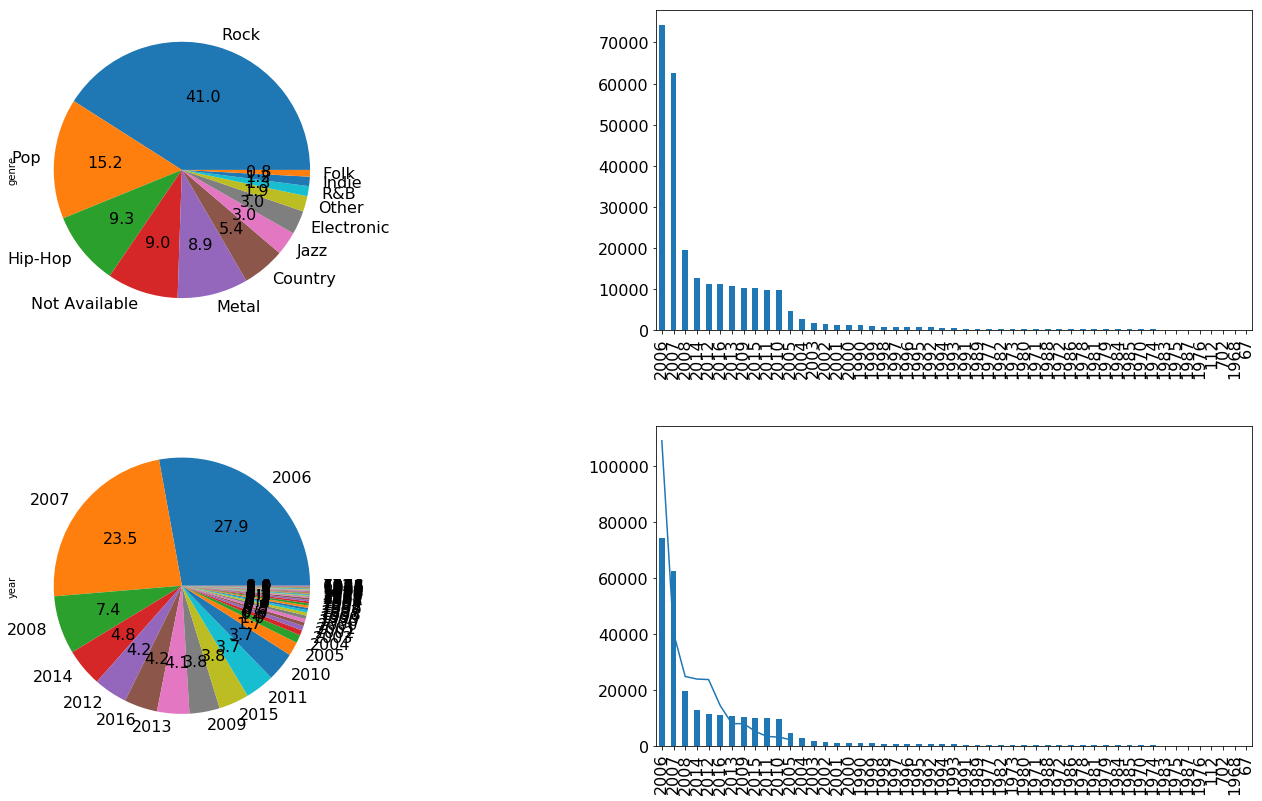

In [104]:
fig, axarr = plt.subplots(2, 2)
fig.tight_layout() # this line is just a nomral plt.plot() function that makes the figure fit in the drawing area

# displaying the percentage using pythons format
genreCount.plot.pie( figsize=(12, 12), fontsize=16, ax=axarr[0][0] , autopct='%.1f' )
genreCount.plot()
yearCount.plot.bar( figsize=(22,12) , fontsize=16, ax=axarr[0][1])
yearCount.plot()

yearCount.plot.pie( figsize=(12, 12), fontsize=16, ax=axarr[1][0], autopct='%.1f' )
yearCount.plot.bar( figsize=(22, 12), fontsize=16, ax=axarr[1][1] )

# songList.sample(n=10) # sample 10 songs

In [105]:
# lets do now the language processing
try:
   import nltk
except ImportError:
    !pip install NLTK
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import seaborn as sns

In [ ]:
customStopWords = ["'s", "n't", "'m", "'re", "'ll","'ve","...", "ä±", "''", '``',\
                  '--', "'d", 'el', 'la']
stopWords = stopwords.words('english') + customStopWords

words = ""
for song in songList.iterrows():
    words += " " + song[1]['lyrics']

words = nltk.word_tokenize( words.lower() )
words = [ word for word in words if len(word) > 1\
                             and not word.isnumeric()\
                             and word not in stopWords ]
    
word_dist = FreqDist( words  )
print("The 10 most common words in the dataset are :")
for word, frequency in word_dist.most_common(10):
    print( u'{} : {}'.format( word, frequency ) )

plt.figure(figsize=(15, 10))
nlp_words = word_dist.plot( 20 )

In [ ]:
# word frequency by genre
for genre in songList['genre'].unique():
    dfGenre = songList[songList['genre']==genre]
    #print (genre + " : " + str(len(dfGenre)) + " songs.") 
    words = ""
    for song in dfGenre.iterrows():
        words += " " + song[1]['lyrics']
        
    words = nltk.word_tokenize( words.lower() )
    words = [ word for word in words if len(word) > 1\
                             and not word.isnumeric()\
                             and word not in stopWords ]
    word_dist = FreqDist( words )
    #for word, frequency in word_dist.most_common(5):
    #    print(u'{} : {}'.format(word, frequency))
    plt.title( genre )
    lp_words = word_dist.plot( 20 )

In [ ]:
# creating a test array of data to train against

test_sample = songList.sample(5) # sampling 5 songs(rows)
for song in test_sample.iterrows():
    words = nltk.word_tokenize( song[1]['lyrics'].lower() )
    words = [ word for word in words if len(word) > 1\
                             and not word.isnumeric()\
                             and word not in stopWords ]
    
    word_dist = FreqDist( words )
    plt.title( song[1]['song'] + " - " + str(song[1]['genre']) )
    word_dist.plot( 20 )

In [ ]:
# computing word frequency of all songs
word_dist = []
for song in songList.iterrows(): # iterrows is a way of telling pandas to loop through the rows(pandas can handle arrays)
    words = nltk.word_tokenize( song[1]['lyrics'].lower() )
    words = [ word for word in words if len(word) > 1\
                             and not word.isnumeric()\
                             and word not in stopWords ]
    word_dist.append( FreqDist( words ) )
songList['word_dist'] = word_dist

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

train, test = train_test_split(songList, test_size=0.2)

X_train, y_test  = train[['song', 'year', 'artist']], train['genre']
X_test,  y_train = test[['song', 'year', 'artist']], test['genre']
X_train, y_test  = train[ 'year' ], train['genre']
X_test,  y_train = test[ 'year' ], test['genre']


clf = MultinomialNB().fit( X_train, y_train )
clf = SVC()
#clf.set_params(kernel='linear').fit(X_train, y_train)